## 2️⃣ Summary Table: When to Consider Non-linear Models

| Clue                                           | What to Consider                                |
|-----------------------------------------------|------------------------------------------------|
| Curved scatter plot                           | Polynomial Regression, Decision Trees          |
| Weak correlation + visible pattern            | Decision Tree, Random Forest                   |
| Effects depend on feature combinations        | Decision Tree, Gradient Boosting               |
| Performance stalls after adding linear terms  | Non-linear regression or ensemble methods      |

---

## 3️⃣ Key Takeaway:
> "Linear regression draws straight lines. But real-life relationships are often curved, stepped, or conditional. Before you even fit a model, your plots and domain knowledge can tell you when it's time to move beyond MLR and explore non-linear algorithms."


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
# for non - linearity

In [4]:
df = pd.read_csv('Datasets/4_advertising_nonlinear.csv')
df.head()

,TV,Radio,Newspaper,Sales,Sales_Nonlinear
0,230.1,37.8,69.2,22.1,5.35
1,44.5,39.3,45.1,10.4,7.20
2,17.2,45.9,69.3,12.0,7.77
3,151.5,41.3,58.5,16.5,9.82
4,180.8,10.8,58.4,17.9,5.66


This Sales_Nonliear was created for testing with non linearity

In [5]:
df.corr()

,TV,Radio,Newspaper,Sales,Sales_Nonlinear
TV,1.000000,-0.080237,-0.139635,0.922118,-0.637193
Radio,-0.080237,1.000000,0.646143,0.164926,0.207907
Newspaper,-0.139635,0.646143,1.000000,0.041153,0.183057
Sales,0.922118,0.164926,0.041153,1.000000,-0.521884
Sales_Nonlinear,-0.637193,0.207907,0.183057,-0.521884,1.000000


In [6]:
# Step 3: Select Features and Target

X = df[['TV', 'Radio']]
y_linear = df['Sales_Nonlinear']


In [7]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_linear, test_size=0.2, random_state=42)


In [8]:
# Step 5: Apply Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
# Predict
y_pred_linear = lin_reg.predict(X_test)

In [10]:
# Evaluate Linear Model
r2_lin = r2_score(y_test, y_pred_linear)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linear))


print("Linear Regression R²:", round(r2_lin, 3))
print("Linear Regression RMSE:", round(rmse_lin, 3))

Linear Regression R²: 0.269
Linear Regression RMSE: 2.144


which gives us idea that this is not a good model.

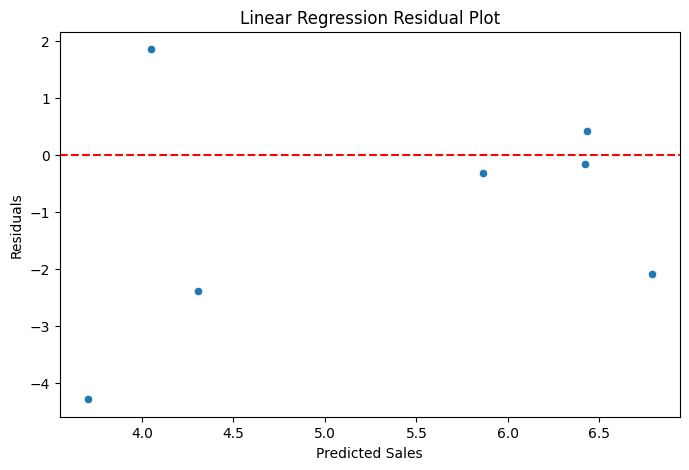

In [11]:
# Plot Residuals for Linear Regression
residuals_lin = y_test - y_pred_linear
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_linear, y=residuals_lin)
plt.axhline(0, color='red', linestyle='--')
plt.title('Linear Regression Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


## Lets do the same with non linear data as above model doesn't seem good enough

In [12]:

poly = PolynomialFeatures(degree=2, include_bias=False)

# Create polynomial features (degree=2) to capture non-linear relationships

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# This transforms features X into [X, X², X1*X2, ...] for better model flexibility
 
# For first sample [2, 3]:

# Original: [x1=2, x2=3]

# Transformed becomes:

# [x1=2, x2=3, x1²=4, x1*x2=6, x2²=9]

# For second sample [1, 4]:

# Original: [x1=1, x2=4]

# Transformed becomes:

# [x1=1, x2=4, x1²=1, x1*x2=4, x2²=16]

# This allows linear regression to model relationships like:

# y = w0*x1 + w1*x2 + w2*x1² + w3*x1*x2 + w4*x2²

# which can capture curved patterns and feature interactions

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:

# Predict
y_pred_poly = poly_reg.predict(X_poly_test)


In [15]:

# Evaluate Polynomial Model
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression R²:", round(r2_poly, 3))
print("Polynomial Regression RMSE:", round(rmse_poly, 3))


Polynomial Regression R²: 0.895
Polynomial Regression RMSE: 0.811


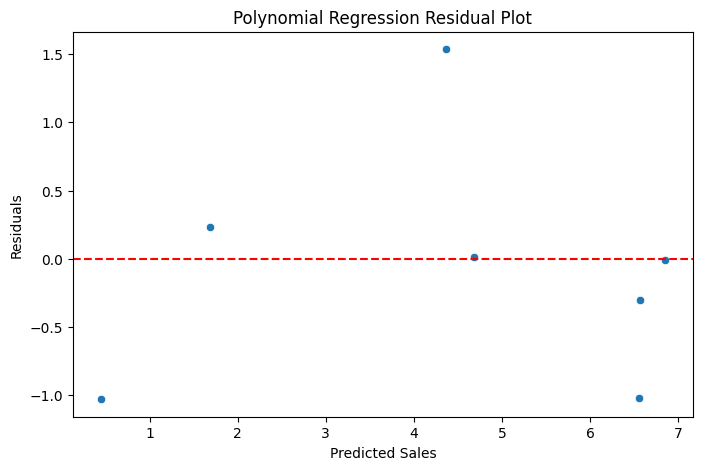

In [16]:

# Plot Residuals for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_poly, y=residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.title('Polynomial Regression Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


#Range is smaller (±1.0 vs. ±4.0 in the linear plot), meaning better accuracy.

In [17]:

# Step 7: Conclusion Summary
print("\nModel Comparison:")
print(f"Linear Regression → R²: {round(r2_lin, 3)}, RMSE: {round(rmse_lin, 3)}")
print(f"Polynomial Regression → R²: {round(r2_poly, 3)}, RMSE: {round(rmse_poly, 3)}")




Model Comparison:
Linear Regression → R²: 0.269, RMSE: 2.144
Polynomial Regression → R²: 0.895, RMSE: 0.811


In [ ]:
# Key Insight:
# If the Polynomial Regression shows higher R² and 
# lower RMSE and more random residuals,
# it indicates a better fit for nonlinear data.
